# **Model Building:**

## Importing Necessary Libraries

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
%matplotlib inline

In [2]:
df = pd.read_csv('./data/Spliited_data.csv')
df.head()

,Rooms per dwelling,Median home value
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rooms per dwelling  506 non-null    float64
 1   Median home value   506 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


# Splitting Datas into X and Y

In [4]:
X = df.iloc[:,-1].to_frame()
y = df.iloc[:,0]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(379, 1) (127, 1) (379,) (127,)


## Scaling X_train and X_test

In [6]:
scaler = StandardScaler()

In [7]:
Scaled_X_train = scaler.fit_transform(X_train)
Scaled_X_test = scaler.transform(X_test)

## Model - Linear Regression

In [8]:
reg = LinearRegression()

In [9]:
reg.fit(Scaled_X_train, y_train)

LinearRegression()

In [10]:
print(reg.coef_)

[0.5109543]


In [11]:
print(reg.intercept_)

6.323496042216359


## Prediciton

In [12]:
y_pred = reg.predict(Scaled_X_test)
y_pred

array([6.36104726, 6.83851898, 5.81846577, 6.31764074, 5.95411114,
       6.16571793, 6.04635   , 5.84016903, 6.14401467, 5.99209185,
       6.24710515, 6.10603396, 5.46036198, 6.2308277 , 6.0843307 ,
       6.69744779, 6.10060815, 5.63398806, 7.7934624 , 5.84559484,
       6.4478603 , 6.65946708, 5.76963344, 6.29593748, 5.85102066,
       5.8293174 , 6.18199537, 5.88900136, 6.25795678, 6.07347907,
       6.33391819, 6.37189889, 5.89442718, 6.20912444, 6.11688559,
       6.13316304, 6.96331272, 6.13858885, 6.40445378, 6.35019563,
       6.14944048, 6.61063475, 7.7934624 , 6.02464674, 6.30678911,
       5.89985299, 5.7913367 , 6.39360215, 6.16029211, 6.38275052,
       6.10603396, 7.00129342, 5.90527881, 6.5183959 , 7.44078443,
       6.2308277 , 6.07890489, 6.62691219, 6.37732471, 6.0843307 ,
       6.43700867, 7.00129342, 6.78968664, 6.17656956, 6.38817634,
       6.16571793, 5.7913367 , 6.42615704, 6.75170594, 5.76963344,
       6.16571793, 6.36647308, 5.66654295, 6.19827281, 6.20912

Text(0, 0.5, 'Predicted Values')

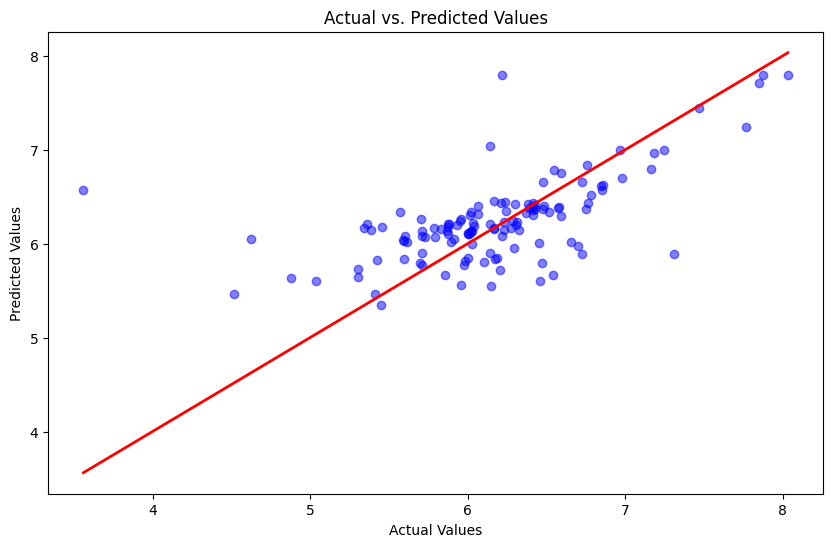

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [14]:
residuals = y_test - y_pred

Text(0, 0.5, 'Residuals')

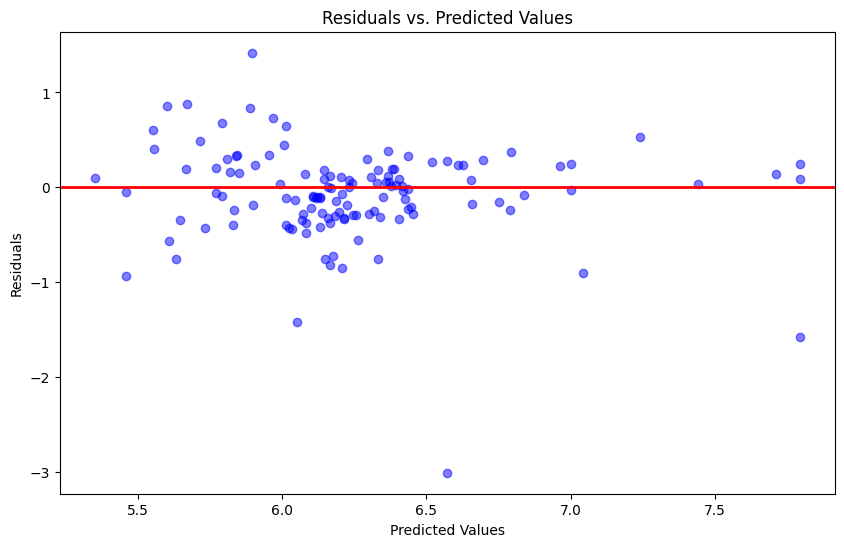

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linewidth=2)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

Text(0, 0.5, 'Frequency')

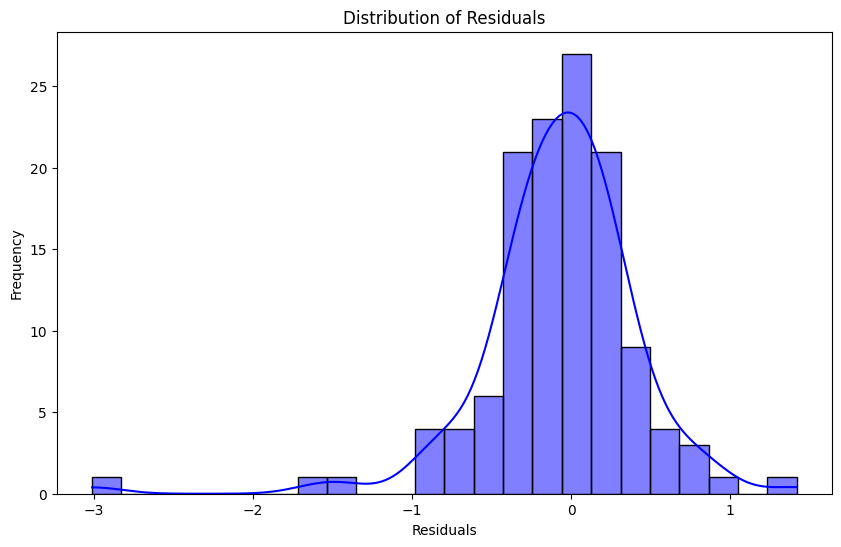

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

## Model Evaluation

In [17]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE:', mse)
print('RMSE:', rmse)

MSE: 0.25143781326513237
RMSE: 0.5014357518816667


In [18]:
mae = mean_absolute_error(y_test, y_pred)

print('MAE:', mae)

MAE: 0.3326837633162111


In [19]:
score = r2_score(y_test, y_pred)
adj_score = 1 - (1 - score) * (len(y_test) -1 ) / (len(y_test) - X_test.shape[1] -1)

print('R2 Score:', score)
print('Ajusted R2 Score:', adj_score)

R2 Score: 0.37413100852503856
Ajusted R2 Score: 0.3691240565932389


<Axes: xlabel='Rooms per dwelling'>

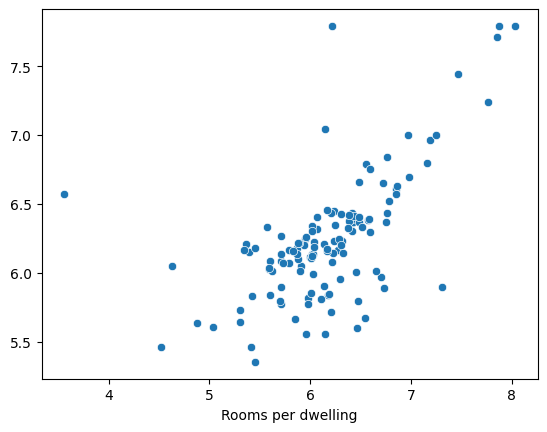

In [20]:
sns.scatterplot(x = y_test, y = y_pred)

<Axes: xlabel='Rooms per dwelling'>

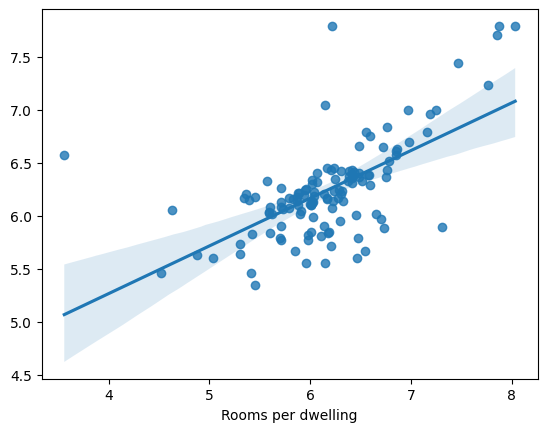

In [21]:
sns.regplot(x = y_test, y = y_pred)

## Observation:
1. MSE: 0.25143781326513237
2. RMSE: 0.5014357518816667
3. MAE: 0.3326837633162111
4. R2 Score: 0.37413100852503856
5. Ajusted R2 Score: 0.3691240565932389

- The R² score and adjusted R² score suggest that the model explains a moderate portion of the variance.
- The MAE and RMSE indicate how far your predictions are from the actual values on average

## L1 (Lasso Regression) Model

In [22]:
l1 = Lasso()

In [28]:
l1.fit(Scaled_X_train, y_train)

l1_pred = l1.predict(Scaled_X_test)
l1_pred

mae = mean_absolute_error(y_test, l1_pred)
mse = mean_squared_error(y_test, l1_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, l1_pred)
adj_score = 1 - (1 - score) * (len(y_test) -1 ) / (len(y_test) - X_test.shape[1] -1)

print('R2 Score:', score)
print('Ajusted R2 Score:', adj_score)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

R2 Score: -0.05967453130992051
Ajusted R2 Score: -0.0681519275603999
MSE: 0.42571568579776775
RMSE: 0.6524689155797139
MAE: 0.47775868946460853


<Axes: xlabel='Rooms per dwelling'>

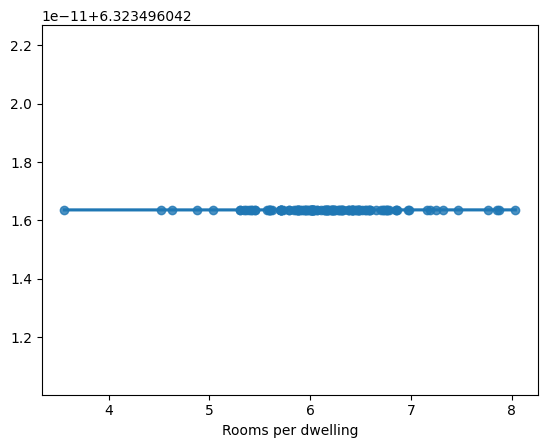

In [31]:
sns.regplot(x = y_test, y = l1_pred)

## L2 (Ridge Regression) Model

In [24]:
l2 = Ridge()

In [32]:
l2.fit(Scaled_X_train, y_train)

l2_pred = l2.predict(Scaled_X_test)
l2_pred

mae = mean_absolute_error(y_test, l2_pred)
mse = mean_squared_error(y_test, l2_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, l2_pred)
adj_score = 1 - (1 - score) * (len(y_test) -1 ) / (len(y_test) - X_test.shape[1] -1)

print('R2 Score:', score)
print('Ajusted R2 Score:', adj_score)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

R2 Score: 0.37437923115129523
Ajusted R2 Score: 0.36937426500050563
MSE: 0.251338091829498
RMSE: 0.5013363061154638
MAE: 0.3327980532945441


<Axes: xlabel='Rooms per dwelling'>

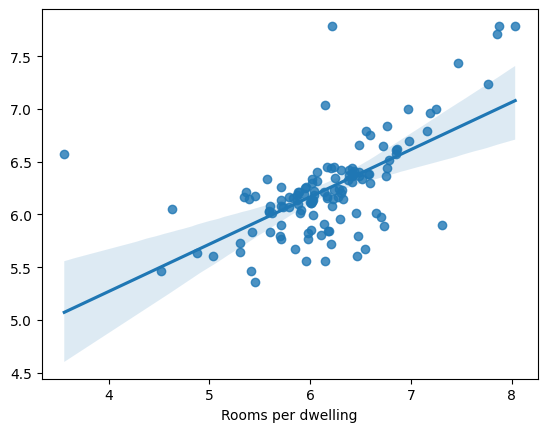

In [33]:
sns.regplot(x = y_test, y = l2_pred)

## L1_And_L2 (ElasticNet) Model

In [25]:
elastic = ElasticNet()

In [34]:
elastic.fit(Scaled_X_train, y_train)

elastic_pred = elastic.predict(Scaled_X_test)
elastic_pred

mae = mean_absolute_error(y_test, elastic_pred)
mse = mean_squared_error(y_test, elastic_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, elastic_pred)
adj_score = 1 - (1 - score) * (len(y_test) -1 ) / (len(y_test) - X_test.shape[1] -1)

print('R2 Score:', score)
print('Ajusted R2 Score:', adj_score)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

R2 Score: -0.0460142211635719
Ajusted R2 Score: -0.05438233493288047
MSE: 0.42022776650713967
RMSE: 0.6482497716984863
MAE: 0.47451205495268856


<Axes: xlabel='Rooms per dwelling'>

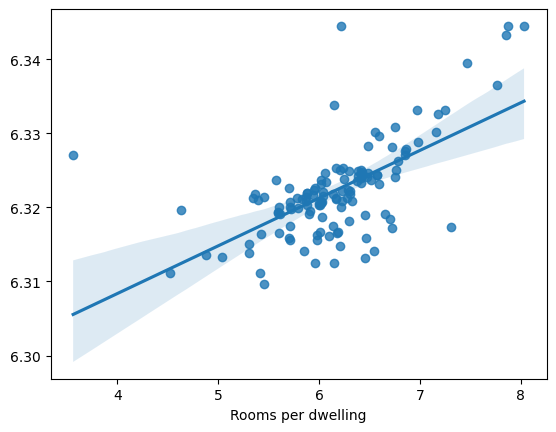

In [35]:
sns.regplot(x = y_test, y = elastic_pred)

## Lasso CV Model

R2 Score: 0.3742261970826083
Ajusted R2 Score: 0.36922000665926924
MSE: 0.2513995720308019
RMSE: 0.5013976186927914
MAE: 0.33272719350797764


<Axes: xlabel='Rooms per dwelling'>

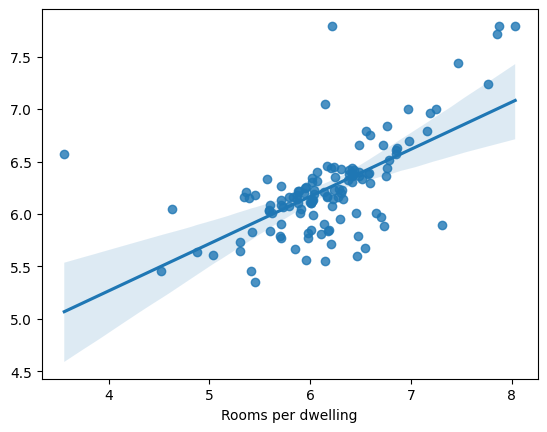

In [38]:
L1_CV = LassoCV()

L1_CV.fit(Scaled_X_train, y_train)

L1_CV_pred = L1_CV.predict(Scaled_X_test)
L1_CV_pred

mae = mean_absolute_error(y_test, L1_CV_pred)
mse = mean_squared_error(y_test, L1_CV_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, L1_CV_pred)
adj_score = 1 - (1 - score) * (len(y_test) -1 ) / (len(y_test) - X_test.shape[1] -1)

print('R2 Score:', score)
print('Ajusted R2 Score:', adj_score)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

sns.regplot(x = y_test, y = L1_CV_pred)

## Ridge CV Model

R2 Score: 0.37437923115128424
Ajusted R2 Score: 0.3693742650004944
MSE: 0.25133809182950245
RMSE: 0.5013363061154682
MAE: 0.33279805329453904


<Axes: xlabel='Rooms per dwelling'>

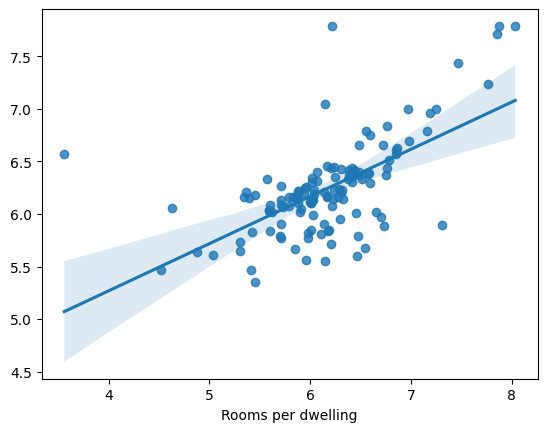

In [40]:
L2_CV = RidgeCV()

L2_CV.fit(Scaled_X_train, y_train)

L2_CV_pred = L2_CV.predict(Scaled_X_test)
L2_CV_pred

mae = mean_absolute_error(y_test, L2_CV_pred)
mse = mean_squared_error(y_test, L2_CV_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, L2_CV_pred)
adj_score = 1 - (1 - score) * (len(y_test) -1 ) / (len(y_test) - X_test.shape[1] -1)

print('R2 Score:', score)
print('Ajusted R2 Score:', adj_score)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

sns.regplot(x = y_test, y = L2_CV_pred)

## ElasticNet CV Model

R2 Score: 0.3742743526530855
Ajusted R2 Score: 0.36926854747431015
MSE: 0.2513802259192318
RMSE: 0.5013783261362939
MAE: 0.33274935083897406


<Axes: xlabel='Rooms per dwelling'>

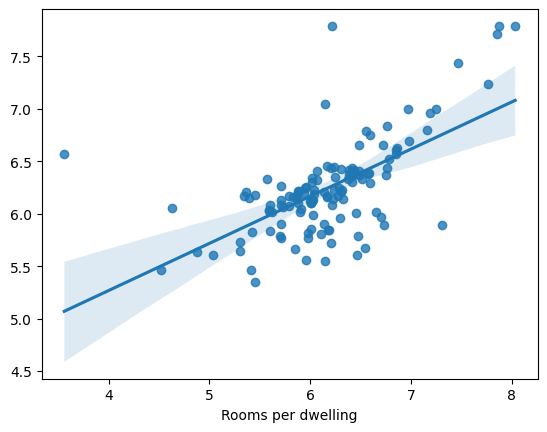

In [42]:
elasticNetCV = ElasticNetCV()

elasticNetCV.fit(Scaled_X_train, y_train)

elasticNetCVpred = elasticNetCV.predict(Scaled_X_test)
elasticNetCVpred

mae = mean_absolute_error(y_test, elasticNetCVpred)
mse = mean_squared_error(y_test, elasticNetCVpred)
rmse = np.sqrt(mse)
score = r2_score(y_test, elasticNetCVpred)
adj_score = 1 - (1 - score) * (len(y_test) -1 ) / (len(y_test) - X_test.shape[1] -1)

print('R2 Score:', score)
print('Ajusted R2 Score:', adj_score)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

sns.regplot(x = y_test, y = elasticNetCVpred)

In [49]:
print('Linear Regression: ')
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
adj_score = 1 - (1 - score) * (len(y_test) -1 ) / (len(y_test) - X_test.shape[1] -1)
print('R2 Score:', score)
print('Ajusted R2 Score:', adj_score)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

print('\n')

print('Lasso Regression: ')
mae = mean_absolute_error(y_test, l1_pred)
mse = mean_squared_error(y_test, l1_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, l1_pred)
adj_score = 1 - (1 - score) * (len(y_test) -1 ) / (len(y_test) - X_test.shape[1] -1)
print('R2 Score:', score)
print('Ajusted R2 Score:', adj_score)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

print('\n')

print('Ridge Regression: ')
mae = mean_absolute_error(y_test, l2_pred)
mse = mean_squared_error(y_test, l2_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, l2_pred)
adj_score = 1 - (1 - score) * (len(y_test) -1 ) / (len(y_test) - X_test.shape[1] -1)
print('R2 Score:', score)
print('Ajusted R2 Score:', adj_score)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

print('\n')

print('ElasticNet Regression: ')
mae = mean_absolute_error(y_test, elastic_pred)
mse = mean_squared_error(y_test, elastic_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, elastic_pred)
adj_score = 1 - (1 - score) * (len(y_test) -1 ) / (len(y_test) - X_test.shape[1] -1)
print('R2 Score:', score)
print('Ajusted R2 Score:', adj_score)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

print('\n')

print('LassoCV Regression: ')
mae = mean_absolute_error(y_test, L1_CV_pred)
mse = mean_squared_error(y_test, L1_CV_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, L1_CV_pred)
adj_score = 1 - (1 - score) * (len(y_test) -1 ) / (len(y_test) - X_test.shape[1] -1)
print('R2 Score:', score)
print('Ajusted R2 Score:', adj_score)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

print('\n')

print('RidgeCV Regression: ')
mae = mean_absolute_error(y_test, L2_CV_pred)
mse = mean_squared_error(y_test, L2_CV_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, L2_CV_pred)
adj_score = 1 - (1 - score) * (len(y_test) -1 ) / (len(y_test) - X_test.shape[1] -1)
print('R2 Score:', score)
print('Ajusted R2 Score:', adj_score)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)


print('\n')
print('ElasticNetCV Regression: ')
mae = mean_absolute_error(y_test, elasticNetCVpred)
mse = mean_squared_error(y_test, elasticNetCVpred)
rmse = np.sqrt(mse)
score = r2_score(y_test, elasticNetCVpred)
adj_score = 1 - (1 - score) * (len(y_test) -1 ) / (len(y_test) - X_test.shape[1] -1)
print('R2 Score:', score)
print('Ajusted R2 Score:', adj_score)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

Linear Regression: 
R2 Score: 0.37413100852503856
Ajusted R2 Score: 0.3691240565932389
MAE: 0.3326837633162111
MSE: 0.25143781326513237
RMSE: 0.5014357518816667


Lasso Regression: 
R2 Score: -0.05967453130992051
Ajusted R2 Score: -0.0681519275603999
MSE: 0.42571568579776775
RMSE: 0.6524689155797139
MAE: 0.47775868946460853


Ridge Regression: 
R2 Score: 0.37437923115129523
Ajusted R2 Score: 0.36937426500050563
MSE: 0.251338091829498
RMSE: 0.5013363061154638
MAE: 0.3327980532945441


ElasticNet Regression: 
R2 Score: -0.0460142211635719
Ajusted R2 Score: -0.05438233493288047
MSE: 0.42022776650713967
RMSE: 0.6482497716984863
MAE: 0.47451205495268856


LassoCV Regression: 
R2 Score: 0.3742261970826083
Ajusted R2 Score: 0.36922000665926924
MSE: 0.2513995720308019
RMSE: 0.5013976186927914
MAE: 0.33272719350797764


RidgeCV Regression: 
R2 Score: 0.37437923115128424
Ajusted R2 Score: 0.3693742650004944
MSE: 0.25133809182950245
RMSE: 0.5013363061154682
MAE: 0.33279805329453904


ElasticNetCV

## Applying Cross Validation

Cross-Validation Scores: [0.48844858 0.26627129 0.51953296 0.55967951 0.555266  ]
Mean R-squared: 0.4778
Standard Deviation of R-squared: 0.1089


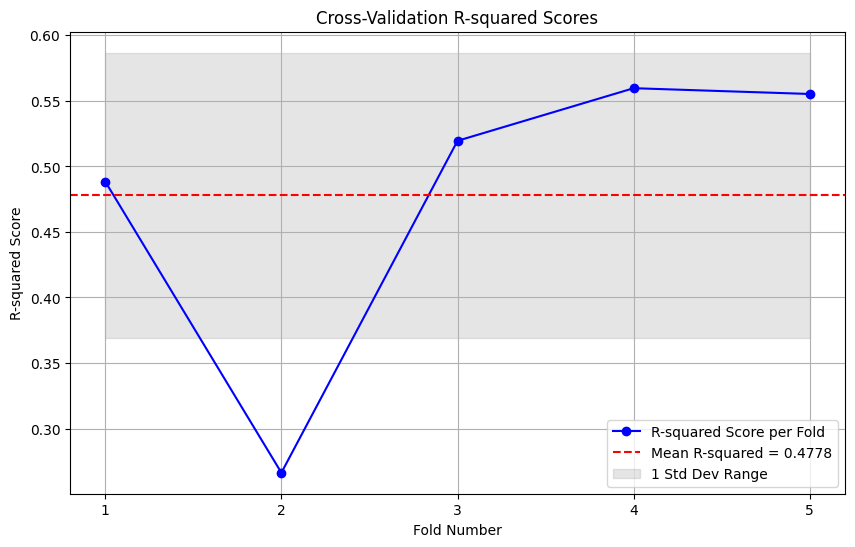

In [48]:
# Linear Regression
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(reg, Scaled_X_train, y_train, cv = kf, scoring='r2')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean R-squared: {cv_scores.mean():.4f}")
print(f"Standard Deviation of R-squared: {cv_scores.std():.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='b', label='R-squared Score per Fold')
plt.axhline(np.mean(cv_scores), color='r', linestyle='--', label=f'Mean R-squared = {np.mean(cv_scores):.4f}')
plt.fill_between(range(1, len(cv_scores) + 1), np.mean(cv_scores) - np.std(cv_scores), np.mean(cv_scores) + np.std(cv_scores), color='gray', alpha=0.2, label='1 Std Dev Range')
plt.title('Cross-Validation R-squared Scores')
plt.xlabel('Fold Number')
plt.ylabel('R-squared Score')
plt.xticks(range(1, len(cv_scores) + 1))
plt.legend()
plt.grid(True)

Cross-Validation Scores: [0.48824627 0.26810183 0.5188045  0.56001851 0.55504334]
Mean R-squared: 0.4780
Standard Deviation of R-squared: 0.1082


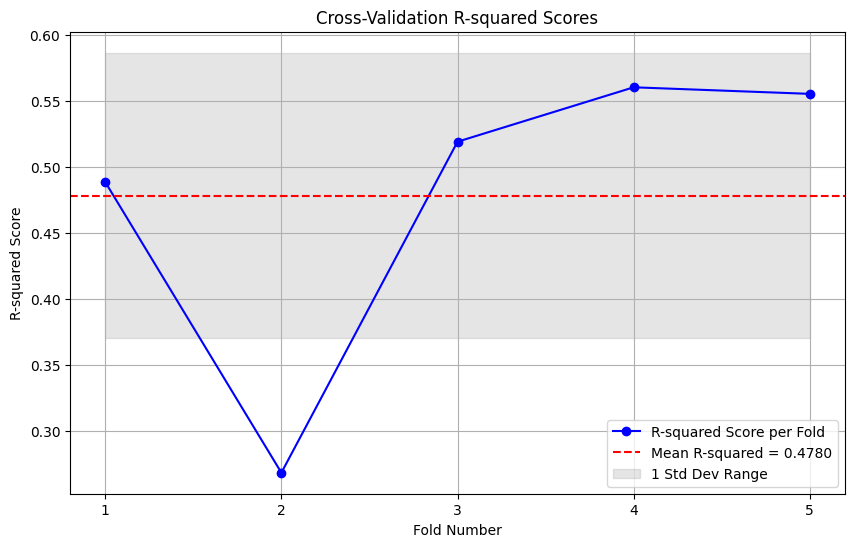

In [50]:
# Ridge Regression 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(l2, Scaled_X_train, y_train, cv = kf, scoring='r2')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean R-squared: {cv_scores.mean():.4f}")
print(f"Standard Deviation of R-squared: {cv_scores.std():.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='b', label='R-squared Score per Fold')
plt.axhline(np.mean(cv_scores), color='r', linestyle='--', label=f'Mean R-squared = {np.mean(cv_scores):.4f}')
plt.fill_between(range(1, len(cv_scores) + 1), np.mean(cv_scores) - np.std(cv_scores), np.mean(cv_scores) + np.std(cv_scores), color='gray', alpha=0.2, label='1 Std Dev Range')
plt.title('Cross-Validation R-squared Scores')
plt.xlabel('Fold Number')
plt.ylabel('R-squared Score')
plt.xticks(range(1, len(cv_scores) + 1))
plt.legend()
plt.grid(True)

Cross-Validation Scores: [0.48824627 0.26810183 0.5188045  0.56001851 0.55504334]
Mean R-squared: 0.4780
Standard Deviation of R-squared: 0.1082


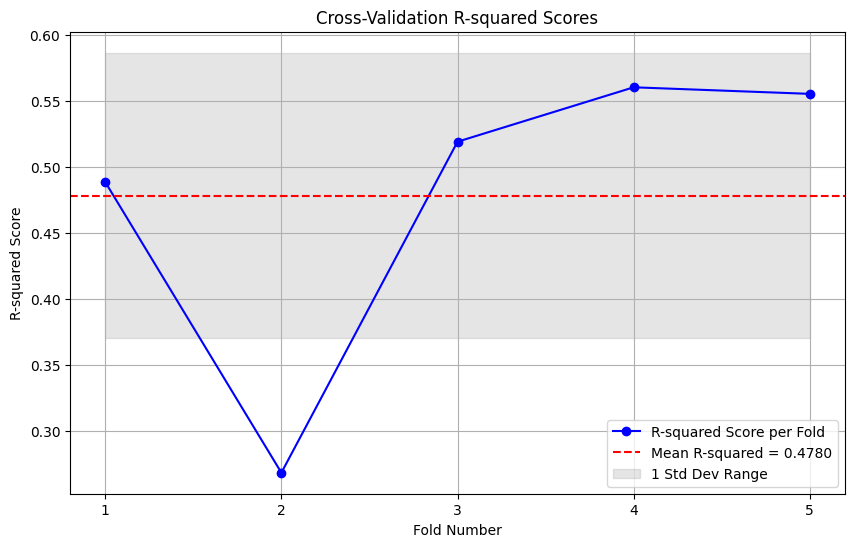

In [51]:
# Ridge CV Regression
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(L2_CV, Scaled_X_train, y_train, cv = kf, scoring='r2')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean R-squared: {cv_scores.mean():.4f}")
print(f"Standard Deviation of R-squared: {cv_scores.std():.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='b', label='R-squared Score per Fold')
plt.axhline(np.mean(cv_scores), color='r', linestyle='--', label=f'Mean R-squared = {np.mean(cv_scores):.4f}')
plt.fill_between(range(1, len(cv_scores) + 1), np.mean(cv_scores) - np.std(cv_scores), np.mean(cv_scores) + np.std(cv_scores), color='gray', alpha=0.2, label='1 Std Dev Range')
plt.title('Cross-Validation R-squared Scores')
plt.xlabel('Fold Number')
plt.ylabel('R-squared Score')
plt.xticks(range(1, len(cv_scores) + 1))
plt.legend()
plt.grid(True)

# Choosing Model For Prediction
- As per Performance metrix and cross validation Ridge and RidgeCV Regression model performance well
- It has highest r2 and adjusted r2 scores cmpared to rest of the model 
- Also the mse, mae, rmse values are maintained low.
- According to cross validation Ridge cv has a r2 score and std of r2score of ridge and ridge cv is 0.4780.

In [53]:
scaler

StandardScaler()

In [57]:
model = L2_CV

In [64]:
pkl.dump(scaler, open('../model/Scaler.pkl', 'wb'))
pkl.dump(model, open('../model/Model.pkl', 'wb'))